# **Drought analysis**

In [2]:
#Installing  required libraries
!pip install climate_library cartopy xarray > /dev/null
!pip install climate-indices xclim > /dev/null

In [ ]:
#import required packages
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cf
import bottleneck
import dask
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point


from climate_library.climate_index import ClimateIndex

In [ ]:
#Connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load and reading the data
spei_data = xr.open_dataset(r'//content/drive/My Drive/Ester AIMS/AIMS project/all_spei_12.nc')
spei_data

<xarray.Dataset>
Dimensions:    (longitude: 720, latitude: 361, time: 2156)
Coordinates:
  * longitude  (longitude) float64 -180.0 -179.5 -179.0 ... 178.5 179.0 179.5
  * latitude   (latitude) float64 -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * time       (time) datetime64[ns] 1979-01-08 1979-01-15 ... 2023-11-30
Data variables:
    value      (time, latitude, longitude) float32 ...

In [ ]:
#Grouping data by years and mean computation
Spei_avg = spei_data.groupby('time.year').mean(keep_attrs = True)

/usr/local/lib/python3.10/dist-packages/xarray/core/concat.py:532: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


##**SPEI 2023 analysis**

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Do

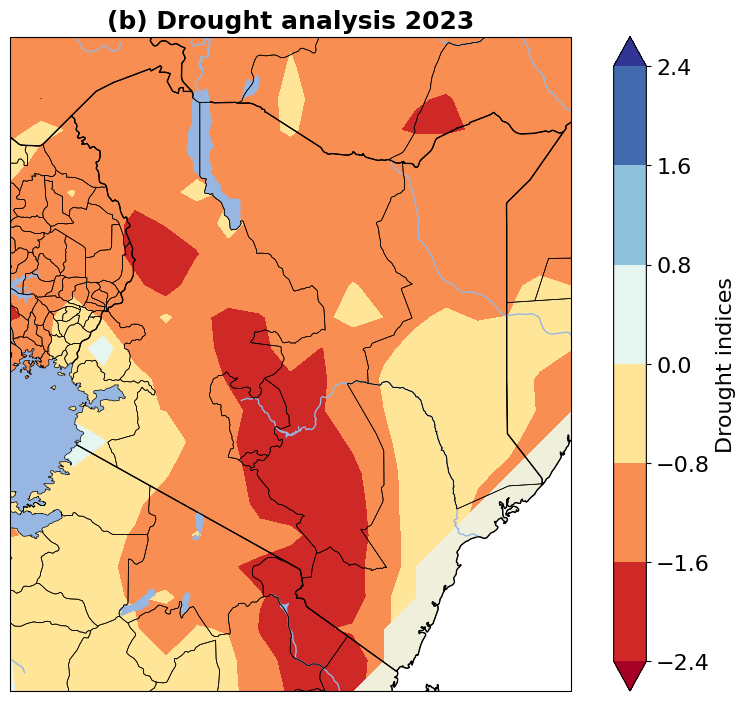

In [ ]:
#select specific year
spei_2023 = Spei_avg.sel(year=2023)

# Create a figure
plt.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(11, 8.5))
ax = plt.axes(projection=ccrs.PlateCarree())

data = spei_2023['value']

# Add state boundaries with a width scale of 10m
ax.add_feature(cf.STATES.with_scale('10m'), zorder=3, linewidth=0.5)

# Make a filled contour plot
cs = ax.contourf(spei_2023['longitude'], spei_2023['latitude'], data,
                 transform=ccrs.PlateCarree(), cmap='RdYlBu', extend='both')
# Slicing Kenya coordinates
ax.set_extent([33, 42, -5, 5.5])

# Add coastlines, borders, ocean, lakes, rivers and gridline
ax.coastlines()
ax.add_feature(cf.BORDERS)
# ax.add_feature(cf.OCEAN, zorder = 100)
ax.add_feature(cf.LAND)
ax.add_feature(cf.LAKES)
ax.add_feature(cf.RIVERS)
# ax.gridlines()

#title of the map
ax.set_title('(b) Drought analysis 2023', fontsize=18, fontweight = 'bold')

# Add colorbar
cbar = plt.colorbar(cs, shrink=1.0, label = 'Drought indices')

##**SPEI 2022 analysis**

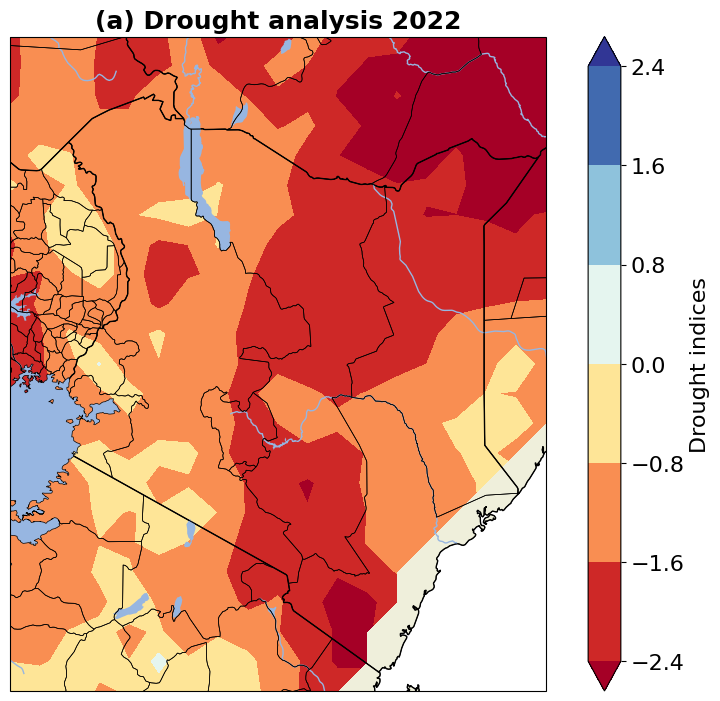

In [ ]:
#select specific year
spei_2022 = Spei_avg.sel(year=2022)

# Create a figure
plt.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(11, 8.5))
ax = plt.axes(projection=ccrs.PlateCarree())

data = spei_2022['value']

# Add state boundaries with a width scale of 10m
ax.add_feature(cf.STATES.with_scale('10m'), zorder=3, linewidth=0.5)

# Make a filled contour plot
cs = ax.contourf(spei_2023['longitude'], spei_2023['latitude'], data,
                 transform=ccrs.PlateCarree(), cmap='RdYlBu', extend='both')
# Slicing Kenya coordinates
ax.set_extent([33, 42, -5, 6])
# Add coastlines, borders, ocean, lakes, rivers and gridline
ax.coastlines()
ax.add_feature(cf.BORDERS)
# ax.add_feature(cf.OCEAN, zorder = 100)
ax.add_feature(cf.LAND)
ax.add_feature(cf.LAKES)
ax.add_feature(cf.RIVERS)
# ax.gridlines()

#title of the map
ax.set_title('(a) Drought analysis 2022', fontsize=18, fontweight = 'bold')

# Add colorbar
cbar = plt.colorbar(cs, shrink=1.0, label = 'Drought indices')

##**Drought difference between 2022 and 2023**

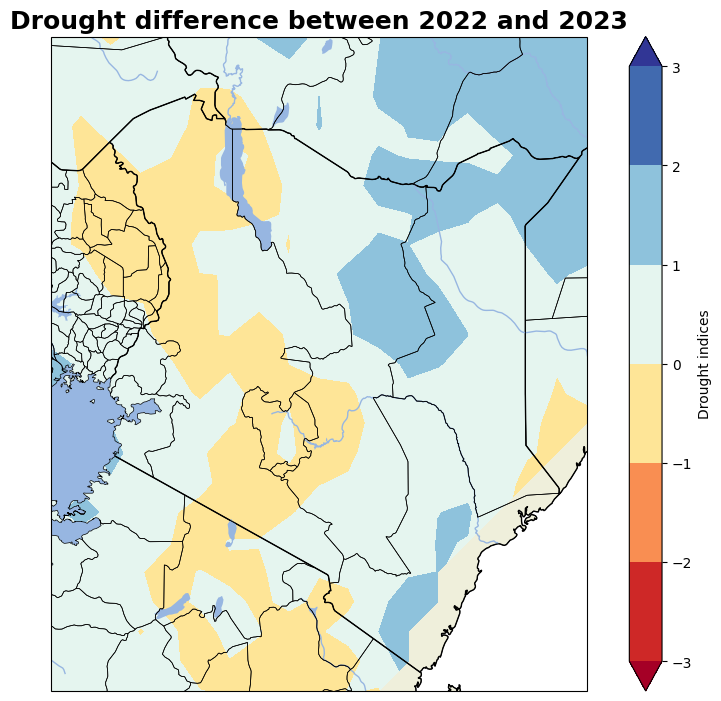

In [ ]:
#2023 and 2022 difference
diff_22_23 = spei_2023 - spei_2022

# Create a figure with specified map projection
fig = plt.figure(figsize=(11, 8.5))
ax = plt.axes(projection=ccrs.PlateCarree())

data = diff_22_23['value']

# Add state boundaries with a width scale of 10m
ax.add_feature(cf.STATES.with_scale('10m'), zorder=3, linewidth=0.5)

# Make a filled contour plot
cs = ax.contourf(diff_22_23['longitude'], diff_22_23['latitude'], data,
                 transform=ccrs.PlateCarree(), cmap='RdYlBu', extend='both')
# ax.set_extent([-20, 68, -40, 40])
ax.set_extent([33, 42, -5, 6])
# Add coastlines, borders, ocean, lakes, rivers and gridline
ax.coastlines()
ax.add_feature(cf.BORDERS)
# ax.add_feature(cf.OCEAN, zorder = 100)
ax.add_feature(cf.LAND)
ax.add_feature(cf.LAKES)
ax.add_feature(cf.RIVERS)
# ax.gridlines()

#title of the map
ax.set_title('Drought difference between 2022 and 2023', fontsize=18, fontweight = 'bold')

# Add colorbar
cbar = plt.colorbar(cs, shrink=1.0, label = 'Drought indices')